In [1]:
import networkx
from kneading_orbital_graph.subshift import SubshiftFiniteType

# Example for SubshiftFiniteType

In [2]:
alphabet = ['b1','a1','a2']
restrictions = [['a2','a1'],['b1','a2'],['a1','b1','a1','b1','a1'],['b1','a1','b1','a1','b1']]

In [3]:
sft = SubshiftFiniteType(alphabet)
sft_graph = sft.generate_graph(restrictions)

# we can compute the adj matrix
adj_matrix = networkx.adj_matrix(sft_graph).todense()

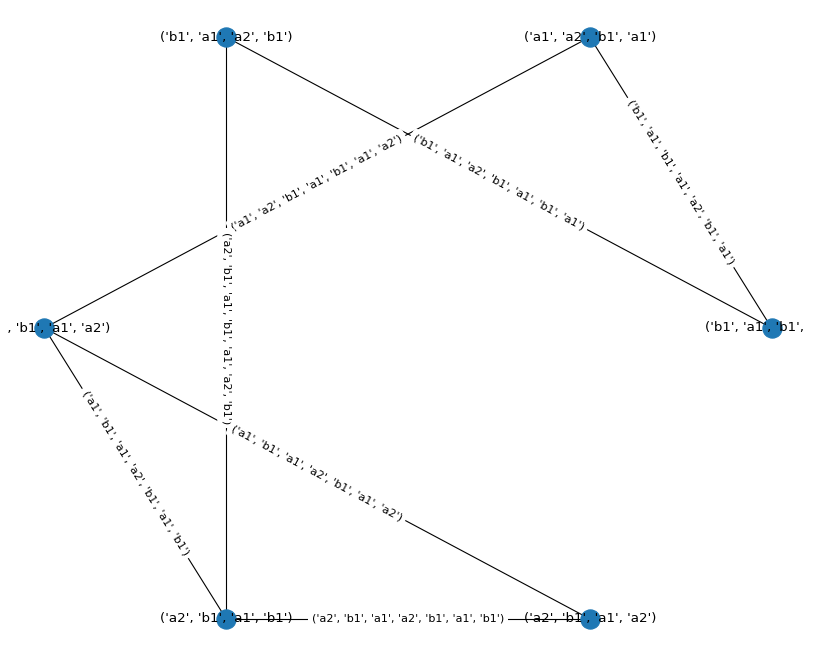

In [4]:
sft.default_subshift_graph_plot(sft_graph)

# Example of SimpleInverseSection

In [5]:
from kneading_orbital_graph.inverse_section import SimpleInverseSection
# Generators must be a dictionary of string with string tuples
# generators = {
#     'b1': ('01'),
#     'a1': ('b1', 'a2'),
#     'a2': ('0', 'a1'),
#     'a3': ('0', 'a1'),
# }
generators = {
    'b1': ('01'),
    'a1': ('b1', 'a2'),
    'a2': ('1', 'a1'),
}

section = ['b1', 'a1']

inverse_section = SimpleInverseSection(generators)
inverse_section.find_inverse_section(section)

{0: [['a1', 'b1', 'a2'],
  ['a1', 'b1', 'a2', 'b1', 'a2'],
  ['a2', 'a1', 'b1', 'a2'],
  ['a2', 'a1', 'b1', 'a2', 'b1', 'a2']],
 1: [['b1', 'a1', 'b1', 'a2']]}

# Example of Orbital Graph

Boundary point: 10100 Fixed points: ['01101', '10110', '11011']


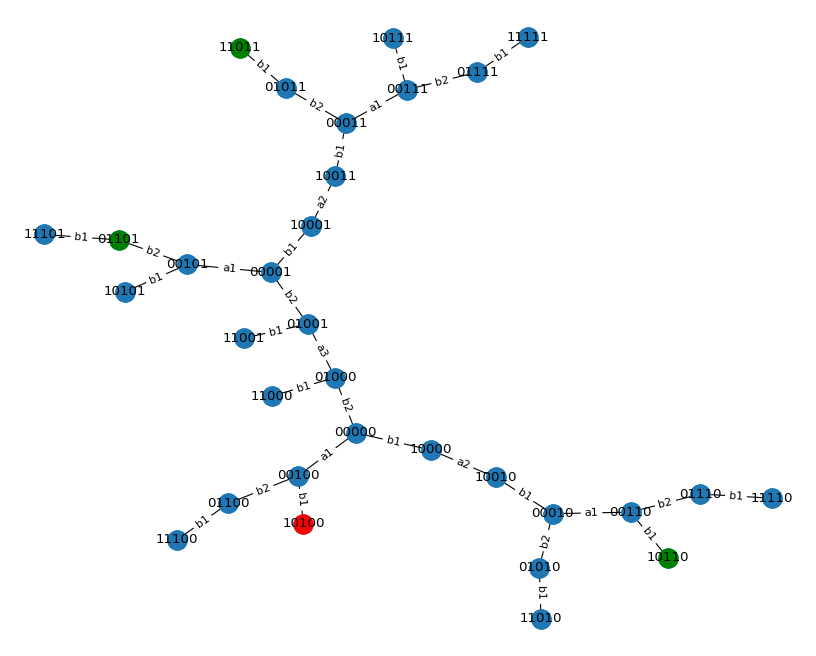

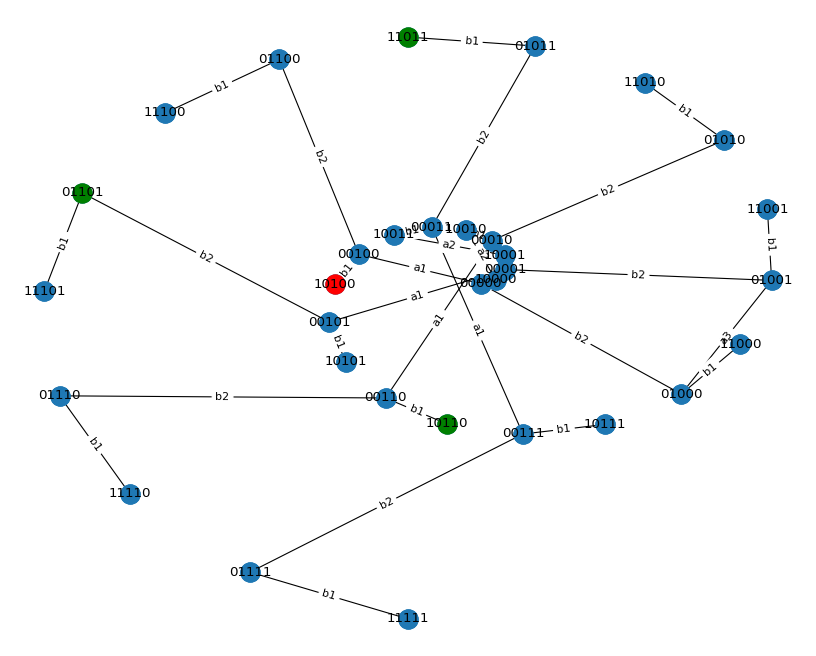

In [6]:
from kneading_orbital_graph.orbital_graph import OrbitalGraph

automata = [('a1', '1'), ('a3', '0'), ('a2', '1'), ('a1', '0'), ('b2', '0')]
# automata = [('a1', '1'), ('a3', '0'), ('a2', '1'), ('a1', '0'), ('b3', '1'), ('b2', '1')]

orbital_graph = OrbitalGraph(automata)
graph, boundary_point, fixed_points = orbital_graph.orbital_graph(level=5)
# graph, boundary_point, fixed_points = orbital_graph.orbital_graph(level=7)

print('Boundary point:', boundary_point, 'Fixed points:', fixed_points)

# use default layout to vizualize the orbital graph
orbital_graph.plot_orbital_graph(graph, boundary_point, fixed_points)

# the layout can be changed by passing nx_layout
orbital_graph.plot_orbital_graph(graph, boundary_point, fixed_points, nx_layout=networkx.spiral_layout)

In [7]:
return_rules = orbital_graph.compute_return_rules(graph, boundary_point, fixed_points)

Number of return rules 93


In [8]:
return_values = orbital_graph.expand_return_rules(return_rules, n_rules=6)

Rules longest lenght 61
Using the first 6 rules
Lenght 5 Rule [['a1', 'a2', 'a3'], 'b2', ['a2', 'a3'], 'b2', ['a1', 'a2', 'a3']]
Lenght 5 Rule [['a1', 'a2', 'a3', 'b2'], 'b1', ['a2', 'a3'], 'b1', ['a1', 'a2', 'a3', 'b2']]
Lenght 5 Rule [['a1', 'a2', 'a3', 'b2'], 'b1', ['a1', 'a2', 'a3'], 'b1', ['a1', 'a2', 'a3', 'b2']]
Lenght 9 Rule [['a1', 'a2', 'a3'], 'b2', ['a2', 'a3'], 'a1', ['a2', 'a3'], 'a1', ['a2', 'a3'], 'b2', ['a1', 'a2', 'a3']]
Lenght 9 Rule [['a1', 'a2', 'a3', 'b2'], 'b1', ['a2', 'a3'], 'a1', ['a2', 'a3'], 'a1', ['a2', 'a3'], 'b1', ['a1', 'a2', 'a3', 'b2']]
Lenght 9 Rule [['a1', 'a2', 'a3', 'b2'], 'b1', ['a1', 'a2', 'a3'], 'b2', ['a2', 'a3'], 'b2', ['a1', 'a2', 'a3'], 'b1', ['a1', 'a2', 'a3', 'b2']]
all values 586


In [9]:
simplified_return_values = orbital_graph.reduce_return_values(return_values)

In [10]:
print('Number of unique return values', len(return_values))

Number of unique return values 586
